Saving 3.jpg to 3 (2).jpg


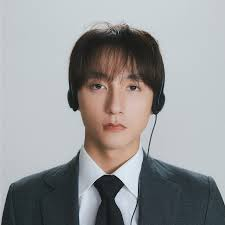

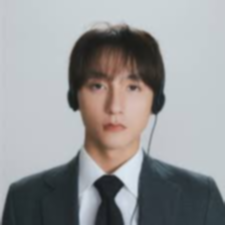

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ma trận Gaussian:
[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


In [13]:
#Bài 1
from google.colab import files
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

uploaded = files.upload()

image_file = list(uploaded.keys())[0]

kernel = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]) / 256

image = cv2.imread(image_file)

if image is None:
    print("Không thể đọc ảnh. Vui lòng tải lại ảnh!")
else:
    filtered_image = cv2.filter2D(image, -1, kernel)

    cv2_imshow(image)
    cv2_imshow(filtered_image)

    cv2.imwrite('filtered_image.jpg', filtered_image)
    files.download('filtered_image.jpg')

print("Ma trận Gaussian:")
print(kernel)

Saving 3.jpg to 3 (3).jpg


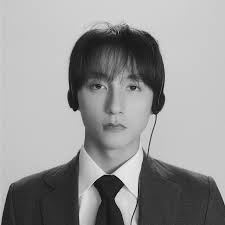

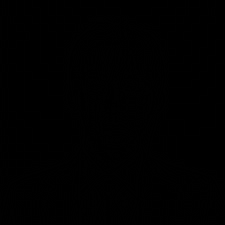

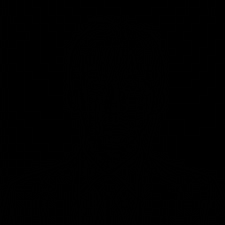

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ma trận kernel a:
[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]
Ma trận kernel b:
[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


In [14]:
#Bài 2
from google.colab import files
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

uploaded = files.upload()

image_file = list(uploaded.keys())[0]

kernel_a = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

kernel_b = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Không thể đọc ảnh")
else:
    filtered_a = cv2.filter2D(image, -1, kernel_a)

    filtered_b = cv2.filter2D(image, -1, kernel_b)

    _, labeled_a = cv2.threshold(filtered_a, 0, 1, cv2.THRESH_BINARY)
    _, labeled_b = cv2.threshold(filtered_b, 0, 1, cv2.THRESH_BINARY)

    cv2_imshow(image)
    cv2_imshow(labeled_a)
    cv2_imshow(labeled_b)

    cv2.imwrite('labeled_a.jpg', labeled_a * 255)
    cv2.imwrite('labeled_b.jpg', labeled_b * 255)
    files.download('labeled_a.jpg')
    files.download('labeled_b.jpg')

print("Ma trận kernel a:")
print(kernel_a)
print("Ma trận kernel b:")
print(kernel_b)

In [10]:
#1.1
import numpy as np

# Dữ liệu chuỗi âm thanh và vector tìm kiếm
A = np.array([0, 0, -1, 2, 3, -1, 0, 1, -1, -1])
search_vector = np.array([0, 1, -1])

# Kiểm tra độ dài
print(len(A), len(search_vector))  # Kết quả: (10, 3)

# Tạo ma trận B để trượt cửa sổ
B = np.array([1])
B = np.resize(B, (len(A) - len(search_vector) + 1, len(search_vector)))
B = np.asmatrix(B)
for i in range(len(A) - len(search_vector) + 1):  # Số dòng
    for j in range(len(search_vector)):  # Số cột
        B[i, j] = A[i + j]
print(B)  # Kết quả: Ma trận B với các cửa sổ trượt

# Tính tích nội (dot product)
C = np.inner(B, search_vector)
print(C)  # Kết quả: Vector C chứa các giá trị dot product

# Tìm vị trí của vector vừa tìm thấy
for i in range(len(A) - len(search_vector) + 1):
    if C[0, i] == np.inner(search_vector, search_vector):
        print(i, B[i])  # Kết quả: Vị trí và cửa sổ tương ứng

10 3
[[ 0  0 -1]
 [ 0 -1  2]
 [-1  2  3]
 [ 2  3 -1]
 [ 3 -1  0]
 [-1  0  1]
 [ 0  1 -1]
 [ 1 -1 -1]]
[[ 1 -3 -1  4 -1 -1  2  0]]
6 [[ 0  1 -1]]


Saving 3.jpg to 3 (1).jpg
Kích thước: 225 x 225
Đã tạo ảnh thu nhỏ.
Đã tạo ảnh làm mờ.
Ảnh gốc:


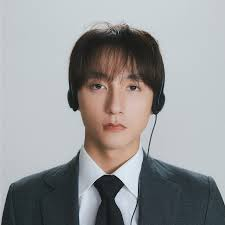

Ảnh thu nhỏ:


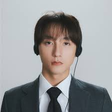

Ảnh làm mờ:


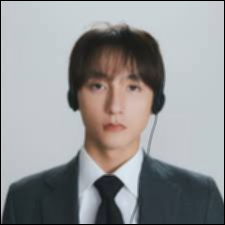

In [12]:
#1.2
# Cài Pillow nếu cần
!pip install pillow

from PIL import Image, ImageDraw
from google.colab import files

# Bước 1: Upload ảnh từ máy lên Colab
uploaded = files.upload()

# Lấy tên file ảnh
input_image_name = list(uploaded.keys())[0]

# Mở ảnh
img = Image.open(input_image_name)
if img.mode != 'RGB':
    img = img.convert("RGB")

print("Kích thước:", img.width, "x", img.height)

# Bước 2: Tạo ảnh mẫu (resize) - FIX dùng Resampling.LANCZOS
new_width = int(img.width / 2)
new_height = int(img.height / 2)
img_small = img.resize((new_width, new_height), Image.Resampling.LANCZOS)
img_small.save('image_small.png')
print("Đã tạo ảnh thu nhỏ.")

# Bước 3: Làm mờ ảnh (Box Blur 3x3)
input_pixels = img.load()
kernel = [
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
]
offset = 1
output_image = Image.new("RGB", img.size)
draw = ImageDraw.Draw(output_image)

for x in range(offset, img.width - offset):
    for y in range(offset, img.height - offset):
        acc = [0, 0, 0]
        for a in range(3):
            for b in range(3):
                xn = x + a - offset
                yn = y + b - offset
                pixel = input_pixels[xn, yn]
                for c in range(3):
                    acc[c] += pixel[c] * kernel[a][b]
        draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))

output_image.save('image_blur.png')
print("Đã tạo ảnh làm mờ.")

# Bước 4: Hiển thị ảnh
from IPython.display import display

print("Ảnh gốc:")
display(img)

print("Ảnh thu nhỏ:")
display(img_small)

print("Ảnh làm mờ:")
display(output_image)

In [15]:
#2.1
import numpy as np

A = np.array([
    [0,   0,   1.0/2, 1.0/2],
    [1.0/3, 0,   0,     0   ],
    [1.0/3, 0,   0,   1.0/2],
    [1.0/3, 1.0, 1.0/2, 0   ]
])

x = np.array([1.0, 1.0, 1.0, 1.0])

print("Lần lặp |   A      B      C      D")
print("--------------------------------------")
print(f"   0   | {x[0]:.4f} {x[1]:.4f} {x[2]:.4f} {x[3]:.4f}")

for i in range(10):
    x = np.dot(A, x)
    print(f"{i+1:>4}   | {x[0]:.4f} {x[1]:.4f} {x[2]:.4f} {x[3]:.4f}")

highest = np.argmax(x)
pages = ['A', 'B', 'C', 'D']
print("\nTrang có PageRank cao nhất:", pages[highest])


Lần lặp |   A      B      C      D
--------------------------------------
   0   | 1.0000 1.0000 1.0000 1.0000
   1   | 1.0000 0.3333 0.8333 1.8333
   2   | 1.3333 0.3333 1.2500 1.0833
   3   | 1.1667 0.4444 0.9861 1.4028
   4   | 1.1944 0.3889 1.0903 1.3264
   5   | 1.2083 0.3981 1.0613 1.3322
   6   | 1.1968 0.4028 1.0689 1.3316
   7   | 1.2002 0.3989 1.0647 1.3361
   8   | 1.2004 0.4001 1.0681 1.3314
   9   | 1.1997 0.4001 1.0658 1.3343
  10   | 1.2001 0.3999 1.0671 1.3330

Trang có PageRank cao nhất: D


In [16]:
#2.2
import numpy as np

A = np.array([
    [0,   0,   1.0/2, 0.0],
    [1.0/3, 0,   0,     0],
    [1.0/3, 0,   0,     0],
    [1.0/3, 1.0, 1.0/2, 0]
])

x = np.array([1.0, 1.0, 1.0, 1.0])

print("Lần lặp |   A      B      C      D")
print("--------------------------------------")
print(f"   0   | {x[0]:.4f} {x[1]:.4f} {x[2]:.4f} {x[3]:.4f}")

for i in range(5):
    x = np.dot(A, x)
    print(f"{i+1:>4}   | {x[0]:.4f} {x[1]:.4f} {x[2]:.4f} {x[3]:.4f}")

print("\nGiá trị sau 5 lần lặp:", x)


Lần lặp |   A      B      C      D
--------------------------------------
   0   | 1.0000 1.0000 1.0000 1.0000
   1   | 0.5000 0.3333 0.3333 1.8333
   2   | 0.1667 0.1667 0.1667 0.6667
   3   | 0.0833 0.0556 0.0556 0.3056
   4   | 0.0278 0.0278 0.0278 0.1111
   5   | 0.0139 0.0093 0.0093 0.0509

Giá trị sau 5 lần lặp: [0.01388889 0.00925926 0.00925926 0.05092593]


In [19]:
#2.3
import numpy as np

N = 8
d = 0.85

A = np.array([
  [0.0,   0.0, 1/2.0,   0.0, 0.0, 0.0, 0.0, 0.0],
  [1.0/3, 0.0, 1/2.0,   0.0, 0.0, 0.0, 0.0, 0.0],
  [1/3.0,  0.0,   0.0,  0.0, 0.0, 0.0, 0.0, 0.0],
  [1.0/3,1/2.0,1/2.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0  ,1/2.0,  0.0, 0.0, 0.0,1/2.0, 0.0,0.0],
  [0.0, 0.0, 0.0,0.0, 0.0, 0.0, 1.0,1/2.0],
  [0.0, 0.0, 0.0,1/2.0, 1.0, 0.0, 0.0, 1/2.0],
  [0.0, 0.0, 0.0,0.0, 0.0,1/2.0, 0.0, 0.0]
])

M = d * A + ((1 - d)/N) * np.ones([N,N])

x = np.array([1.0/N] * N)

print("Lần lặp |", " ".join([f"{chr(65+i):>6}" for i in range(N)]))
print("-"*70)
print(f"   0   | {' '.join([f'{xi:.4f}' for xi in x])}")

for i in range(7):
  x = np.dot(M, x)
  print(f"{i+1:>4}   | {' '.join([f'{xi:.4f}' for xi in x])}")

highest = np.argmax(x)
pages = [chr(65+i) for i in range(N)]
print("\nNode có PageRank cao nhất:", pages[highest])



Lần lặp |      A      B      C      D      E      F      G      H
----------------------------------------------------------------------
   0   | 0.1250 0.1250 0.1250 0.1250 0.1250 0.1250 0.1250 0.1250
   1   | 0.0719 0.1073 0.0542 0.1604 0.1250 0.1781 0.2313 0.0719
   2   | 0.0418 0.0621 0.0391 0.1077 0.1401 0.2459 0.2237 0.0945
   3   | 0.0345 0.0464 0.0297 0.0728 0.1488 0.2482 0.2229 0.1224
   4   | 0.0300 0.0398 0.0271 0.0595 0.1426 0.2588 0.2268 0.1228
   5   | 0.0285 0.0370 0.0255 0.0540 0.1439 0.2620 0.2157 0.1270
   6   | 0.0276 0.0357 0.0248 0.0514 0.1438 0.2541 0.2160 0.1281
   7   | 0.0271 0.0349 0.0243 0.0501 0.1397 0.2546 0.2151 0.1245

Node có PageRank cao nhất: F
